In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import numpy as np

In [2]:
df1 = pd.read_spss("I Trimestre 2023.sav")

In [3]:
df1["Horas_normales_principal"]

0         NaN
1        70.0
2         NaN
3        40.0
4         NaN
         ... 
22887     NaN
22888     NaN
22889    48.0
22890     NaN
22891     NaN
Name: Horas_normales_principal, Length: 22892, dtype: category
Categories (81, object): [1.0, 2.0, 3.0, 4.0, ..., 96.0, 98.0, 105.0, 'Ignorado']

In [4]:
df = pd.read_spss("I Trimestre 2023.sav")[['Sexo', 'Edad', "Educacion_nivel_grado", "Formalidad_informalidad", "Seguro", "Ingreso_asalariado",
"Ingreso_asalariado_bruto", "Ingreso_bruto_total_trabajo_hora", "Ingreso_bruto_principal_hora", "Ingreso_bruto_principal_monet"
                                           ,"Ingreso_bruto_principal", "Horas_normales_principal"]]

In [43]:
df2 = df.dropna(subset=["Ingreso_bruto_principal","Horas_normales_principal"])
df2["Edad"] = df2["Edad"].replace(to_replace= ["97 años y más", "Mayor de 15 años con edad ignorada",
                                               'Menor de 15 años con edad ignorada', 'Menor de un año'], value = [97, np.nan, 14, 0]).astype(float)

df2["Horas_normales_principal"] = df2["Horas_normales_principal"].replace(to_replace= "Ignorado", value = np.nan)

df2["Ingreso_bruto_principal"] =df2["Ingreso_bruto_principal"].astype(float)
df2["Horas_normales_principal"] = df2["Horas_normales_principal"].astype(float)
df2["Income_monthly"] = df2["Ingreso_bruto_principal"]

df2["Hourly_income"] = df2["Income_monthly"] / (4* df2["Horas_normales_principal"])
df2["Weekly_hours"] = df2["Horas_normales_principal"]

df2["log_Hourly_income"] = np.log(df2["Hourly_income"])
df2["log_Income_monthly"] = np.log(df2["Income_monthly"])


C:\Users\camil\AppData\Local\Temp\ipykernel_24696\2523118119.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["Edad"] = df2["Edad"].replace(to_replace= ["97 años y más", "Mayor de 15 años con edad ignorada",
C:\Users\camil\AppData\Local\Temp\ipykernel_24696\2523118119.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2["Edad"] = df2["Edad"].replace(to_replace= ["97 años y más", "Mayor de 15 años con edad ignorada",
C:\Users\camil\AppData\Local\Temp\ipykernel_24696\2523118119.py:2: SettingWithCopyWarning: 
A value is trying to be set on 

In [40]:
df2["Edad"].replace(to_replace= "97 años y más", value = 97)

1        55.0
3        36.0
5        60.0
6        44.0
7        58.0
         ... 
22875    24.0
22876    25.0
22880    21.0
22883    25.0
22889    45.0
Name: Edad, Length: 7659, dtype: category
Categories (100, object): [1.0, 2.0, 3.0, 4.0, ..., 97, 'Mayor de 15 años con edad ignorada', 'Menor de 15 años con edad ignorada', 'Menor de un año']

In [46]:
df2["Horas_normales_principal"] > 11

1        True
3        True
5        True
6        True
7        True
         ... 
22875    True
22876    True
22880    True
22883    True
22889    True
Name: Horas_normales_principal, Length: 7659, dtype: bool

In [49]:
#Generate subsample
mask = (df2["Hourly_income"] > 7.89) & (df2["Edad"]> 17)  & (df2["Edad"] < 56 ) & (df2["Horas_normales_principal"] > 11)
df_sub = df2[mask]

In [57]:
df_sub_Male = df_sub[df_sub["Sexo"] == "Hombre"]
df_sub_Female = df_sub[df_sub["Sexo"] == "Mujer"]

In [61]:
plt.style.use("bmh")

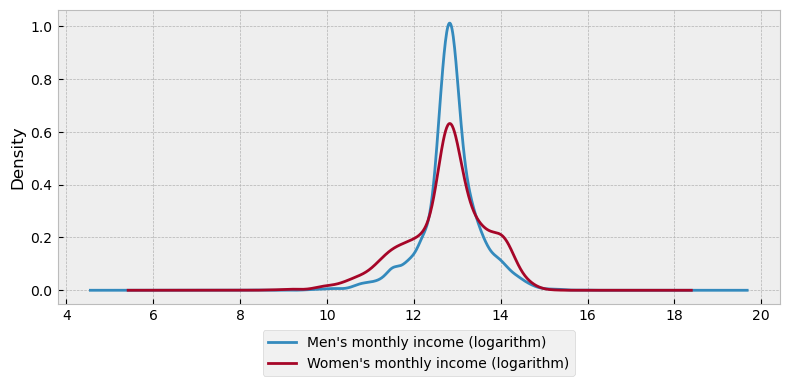

In [82]:
#First Kernel density
plt.figure(figsize=(8,4))
df_sub_Male["log_Income_monthly"].plot(kind='density')
df_sub_Female["log_Income_monthly"].plot(kind='density')

plt.legend(labels = ["Men's monthly income (logarithm)", "Women's monthly income (logarithm)"], 
          bbox_to_anchor =(0.5,-0.27), loc='lower center')

plt.tight_layout()
plt.savefig("kdensit_Monthly_income.png");


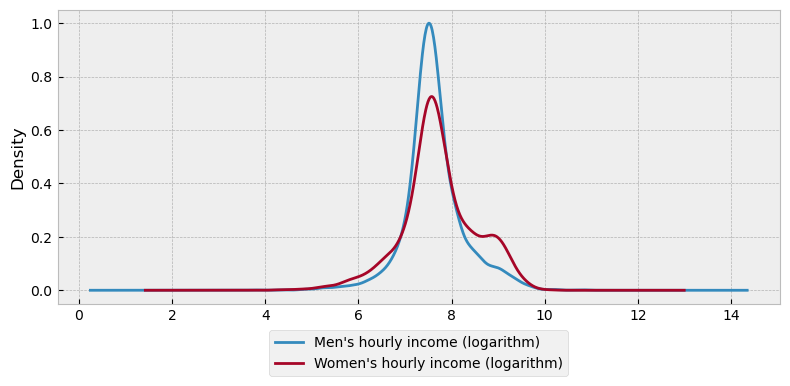

In [83]:
#Second Kernel density
plt.figure(figsize=(8,4))
df_sub_Male["log_Hourly_income"].plot(kind='density')
df_sub_Female["log_Hourly_income"].plot(kind='density')

plt.legend(labels = ["Men's hourly income (logarithm)", "Women's hourly income (logarithm)"], 
           bbox_to_anchor =(0.5,-0.27), loc='lower center')

plt.tight_layout()
plt.savefig("kdensit_Hourly_income.png");





In [108]:
df_sub["Sex"] = df_sub["Sexo"].copy()

df_sub["Sex"] = df_sub["Sex"].replace(to_replace= ["Hombre", "Mujer" ], value = [ "Men", "Women"])

C:\Users\camil\AppData\Local\Temp\ipykernel_24696\265088040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Sex"] = df_sub["Sexo"].copy()
C:\Users\camil\AppData\Local\Temp\ipykernel_24696\265088040.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_sub["Sex"] = df_sub["Sex"].replace(to_replace= ["Hombre", "Mujer" ], value = [ "Men", "Women"])
C:\Users\camil\AppData\Local\Temp\ipykernel_24696\265088040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

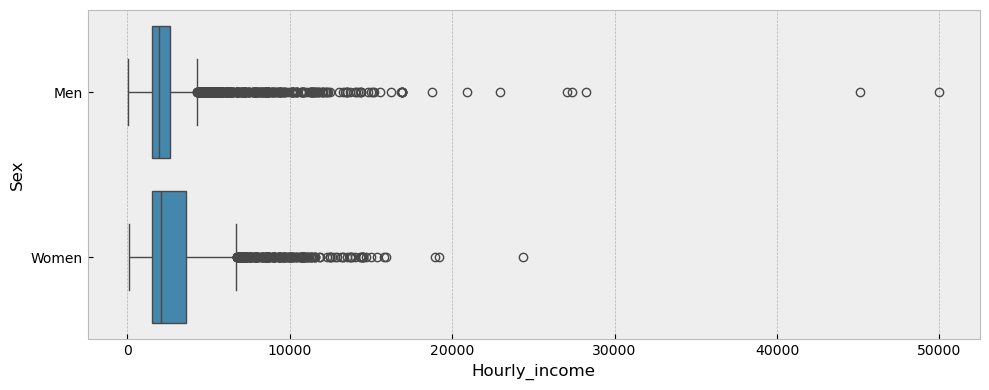

In [109]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df_sub, y = "Sex", x = "Hourly_income")

plt.tight_layout()
plt.savefig("Boxplot.png");

<Axes: ylabel='Hourly_income'>

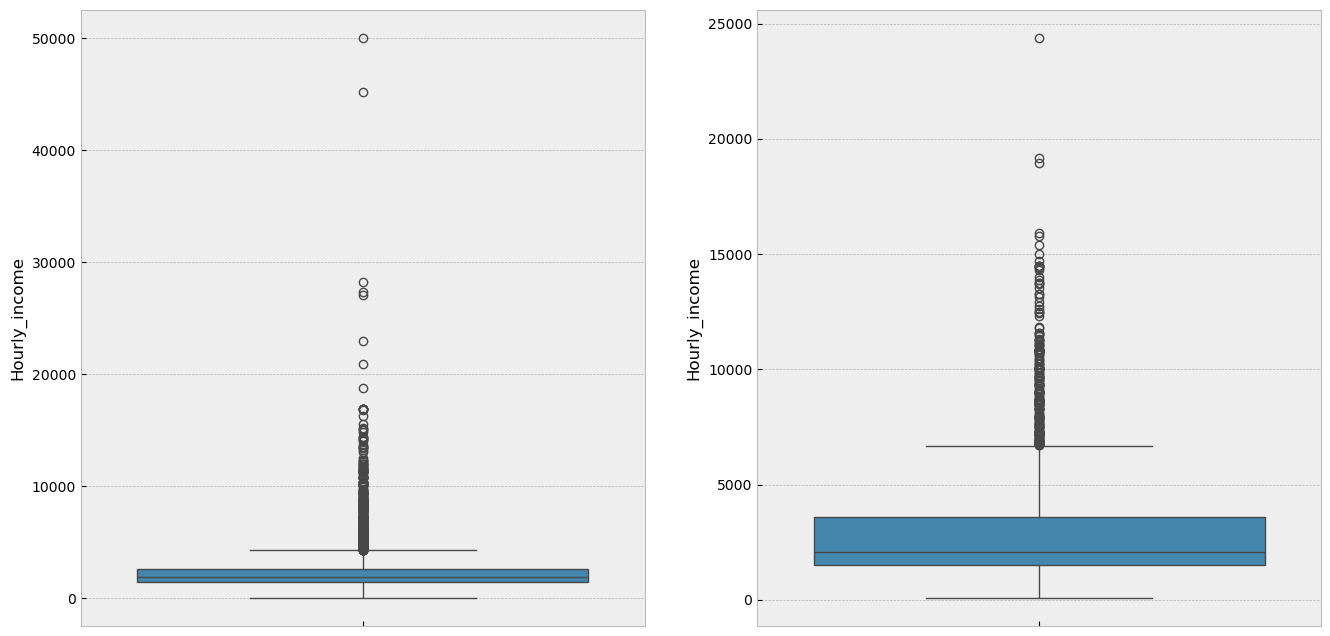

In [95]:
fig, axs = plt.subplots(1,2, figsize=(16, 8))

sns.boxplot(df_sub_Male["Hourly_income"], ax = axs[0] )
sns.boxplot(df_sub_Female["Hourly_income"], ax = axs[1] )

<Axes: ylabel='log_Hourly_income'>

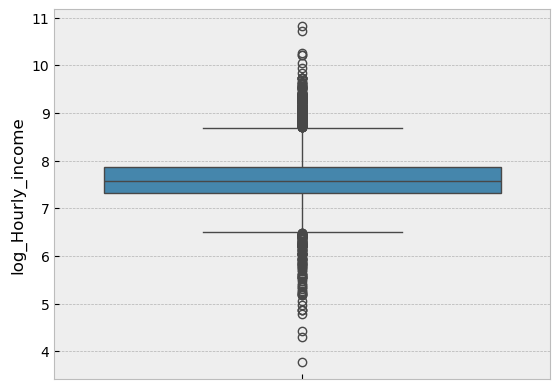

In [97]:
df_sub

,Sexo,Edad,Educacion_nivel_grado,Formalidad_informalidad,Seguro,Ingreso_asalariado,Ingreso_asalariado_bruto,Ingreso_bruto_total_trabajo_hora,Ingreso_bruto_principal_hora,Ingreso_bruto_principal_monet,Ingreso_bruto_principal,Horas_normales_principal,Hourly income,Weekly_hours,log_Hourly_income,log_Income_monthly,Income_monthly,Hourly_income
1,Mujer,55.0,54.0,Con empleo informal,Sí,2.345417e+05,2.345417e+05,773.809524,773.809524,2.345417e+05,2.345417e+05,70.0,773.809524,70.0,6.730599,12.365389,2.345417e+05,837.648810
3,Hombre,36.0,82.0,Con empleo formal,Sí,1.029408e+06,1.156108e+06,6674.990377,6674.990377,1.156108e+06,1.156108e+06,40.0,6674.990377,40.0,8.885396,13.960570,1.156108e+06,7225.677083
6,Hombre,44.0,21.0,Con empleo formal,Sí,3.526427e+05,3.916667e+05,1884.462407,1884.462407,3.916667e+05,3.916667e+05,48.0,1884.462407,48.0,7.620671,12.878166,3.916667e+05,2039.930556
11,Hombre,40.0,26.0,Con empleo formal,Sí,3.125547e+05,3.466667e+05,1667.949705,1667.949705,3.466667e+05,3.466667e+05,48.0,1667.949705,48.0,7.498624,12.756119,3.466667e+05,1805.555556
12,Hombre,38.0,26.0,Con empleo formal,Sí,3.242757e+05,3.596667e+05,1730.497819,1730.497819,3.596667e+05,3.596667e+05,48.0,1730.497819,48.0,7.535438,12.792933,3.596667e+05,1873.263889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22875,Hombre,24.0,26.0,Con empleo formal,Sí,3.283333e+05,3.683333e+05,1772.196561,1772.196561,3.683333e+05,3.683333e+05,48.0,1772.196561,48.0,7.559248,12.816744,3.683333e+05,1918.402778
22876,Hombre,25.0,22.0,Con empleo formal,Sí,2.850000e+05,3.250000e+05,1563.702848,1563.702848,3.250000e+05,3.250000e+05,48.0,1563.702848,48.0,7.434085,12.691580,3.250000e+05,1692.708333
22880,Hombre,21.0,26.0,Con empleo formal,Sí,3.336667e+05,3.816667e+05,1632.309754,1632.309754,3.816667e+05,3.816667e+05,54.0,1632.309754,54.0,7.477024,12.852303,3.816667e+05,1766.975309
22883,Hombre,25.0,15.0,Con empleo formal,Sí,3.166667e+05,3.566667e+05,1372.850911,1372.850911,3.566667e+05,3.566667e+05,60.0,1372.850911,60.0,7.303918,12.784557,3.566667e+05,1486.111111


<Axes: xlabel='Sexo', ylabel='Hourly_income'>

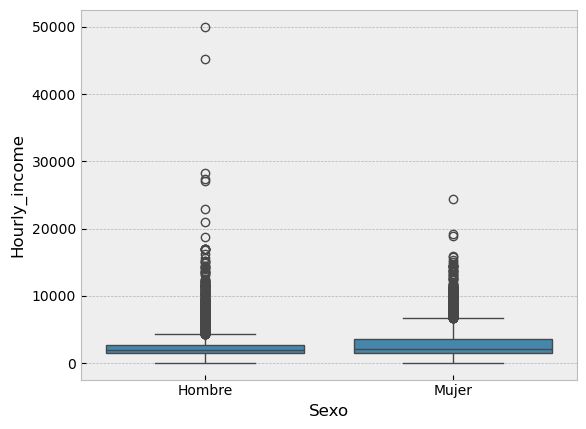

In [75]:
df_sub.shape

(6219, 18)

In [21]:
df.columns

Index(['ID_AMO', 'ID_TRIMESTRE', 'ID_VIVIENDA', 'ID_HOGAR', 'ID_LINEA', 'Sexo',
       'Edad', 'Estado_conyugal', 'Lugar_nacimiento', 'Permanencia_pais',
       ...
       'Mas_40horas_menos_minimoingreso', 'Ocupados_con_Conectividad',
       'Consecutivo', 'N_hogar', 'Grupo_edad', 'Ingreso_principal_nomonetario',
       'Poblacion_joven', 'Poblacion_adulto', 'Joven_nini', 'Tipo_seguro'],
      dtype='object', length=308)

In [ ]:
pd.